# COVID-19 in Mexico
### Open data from the General Direction of epidemiology

**Project Description:** This is our first teamwork project that consists on analyze COVID-19 cases in Mexico.

***Team:*** Bernardo Jardon, Miguel Bonachea, Odin Del Toro, Pablo Arroyo. 

**Objective:** Determine the current situation of cases with COVID-19 in Mexico through the analysis and visualization of the evolution of variables related to the disease in time.

**Topics and research questions:**
**Evolution of the disease and spread rates** Consider that you can modify the questions and the approach of each analysis so feel free to adjust Questions section, at last there will be a merged archive. Assigned to Odin. 

****Questions**** Odin
* What's the spread rate of the COVID-19 cases?
* What's the pace of evolution of the disease in days until being interned in hospitals?
* Spread rate per location, gender, age, origin (phase I, II and III when was the date of change and how it related to the evolution of the disease in total cases, etc...)

**Pre-existing diseases** Consider that you can modify the questions and the approach of each analysis so feel free to adjust Questions section, at last there will be a merged archive. Assigned to Pablo and Bernardo.

****Questions**** Pablo
* Which variables are more correlated (Risk groups and deaths)
* Which variables are more correlated to the increase of positive cases of COVID-19?
* What's the mortality rate and correlation for positive COVID-19 cases of death?

****Questions**** Bernardo
* Ambulatory cases related to diseases
* Interned cases related to diseases (% deaths)
* Intensive care unit cases (% deaths)
* Intubated cases

**Hospitals sectors** Consider that you can modify the questions and the approach of each analysis so feel free to adjust Questions section, at last there will be a merged archive. Assigned to Miguel. 

****Questions**** Miguel
* What's the distribution of cases in Mexico? What's the distribution per Health Centers? 
* Demand for patient care in hospitals, gender, location, age, etc...

***Related variables for all topics to use in analysis:*** Origin, Sector, Gender, Entities, Municipalities, Type of patients (Ambulatory|Hospitalized), Dates of of admission, symptoms and death, Age, Nationality and Diseases. 

***Notes:*** Remember to give notice of the analysis you will make when starting to it to avoid repetitive analysis because topics have a lot of related variables. For description of variables used in topics research review the descriptors file.

***Dataset:*** The data is extracted from the Mexican Health Secretary in the following link
[COVID-19](https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es)

***Data premises:*** 
* Data is updated on a daily basis. 
* Acummulated data as of 05/05/2020.
 
***Milestone structure tasks:***
* Data gathering. Find a dataset that accomplished the requirements for the analysis.
* Clean and format the datasets. Describe the process of data exploration and cleanup.
* Data processing and analysis.
* Data visualization. Find correlation between variables. Consider at least two visualizations per question and save them as PNG images. 
* Summarize findings with answers to the questions and a short description with relevant plots.
* Make a presentation that includes questions of the research, data source and process to find answer for questions, description of data exploration and cleanup process, analysis process, conclusions with numerical and visualizations summary, and interpretation of the findings from the results. 
 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress

# Files to read
covid_mx_data = 'Resources/200505COVID19MEXICO.csv'
covid_mx_entities = 'Catalogues/Entities.csv'
covid_mx_gender = 'Catalogues/Gender.csv'
covid_mx_municipalities = 'Catalogues/Municipalities.csv'
covid_mx_nationality = 'Catalogues/Nationality.csv'
covid_mx_origin = 'Catalogues/Origin.csv'
covid_mx_results = 'Catalogues/Results.csv'
covid_mx_sector = 'Catalogues/Sector.csv'
covid_mx_patients = 'Catalogues/Type_of_patient.csv'
covid_mx_yes_no = 'Catalogues/Yes_or_No.csv'
covid_mx_clean = 'Resources/COVID_Clean_Data.csv'

# Read files
covid_mx_df = pd.read_csv(covid_mx_data, encoding='utf-8')
entities_df = pd.read_csv(covid_mx_entities, encoding='utf-8')
gender_df = pd.read_csv(covid_mx_gender, encoding='utf-8')
municipalities_df = pd.read_csv(covid_mx_municipalities, encoding='utf-8')
nationality_df = pd.read_csv(covid_mx_nationality, encoding='utf-8')
origin_df = pd.read_csv(covid_mx_origin, encoding='utf-8')
results_df = pd.read_csv(covid_mx_results, encoding='utf-8')
sector_df = pd.read_csv(covid_mx_sector, encoding='utf-8')
patients_df = pd.read_csv(covid_mx_patients, encoding='utf-8')
yes_no_df = pd.read_csv(covid_mx_yes_no, encoding='utf-8')
covid_mx_clean_df = pd.read_csv(covid_mx_clean, encoding='utf-8')

## Cleanup and format dataset

***Comments:***
* We had encountered that the data from source has special characters that can't be read with several encodings, so we had to replace values with VSC from source deleting accents from files.
* After removing accents, some capital letters change to lowercase in the catalogues.

In [2]:
# Use the function title to adjust values in column "ENTIDAD_FEDERATIVA"
entities_df['ENTIDAD_FEDERATIVA'] = entities_df['ENTIDAD_FEDERATIVA'].str.title()
entities_df

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,Aguascalientes,AS
1,2,Baja California,BC
2,3,Baja California Sur,BS
3,4,Campeche,CC
4,5,Coahuila De Zaragoza,CL
5,6,Colima,CM
6,7,Chiapas,CS
7,8,Chihuahua,CH
8,9,Ciudad De Mexico,DF
9,10,Durango,DG


In [3]:
# Use the function upper to change lowercases in headers 
gender_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
gender_df['DESCRIPCION'] = gender_df['DESCRIPCION'].str.title()
gender_df

,CLAVE,DESCRIPCION
0,1,Mujer
1,2,Hombre
2,99,No Especificado


In [4]:
# Use the function title to adjust values in column "MUNICIPIO"
municipalities_df['MUNICIPIO'] = municipalities_df['MUNICIPIO'].str.title()
municipalities_df

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
0,1,Aguascalientes,1
1,2,Asientos,1
2,3,Calvillo,1
3,4,Cosio,1
4,5,Jesus Maria,1
...,...,...,...
2496,999,No Especificado,32
2497,999,No Especificado,36
2498,997,No Aplica,97
2499,998,Se Ignora,98


In [5]:
# Use the function upper to change lowercases in headers 
nationality_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
nationality_df['DESCRIPCION'] = nationality_df['DESCRIPCION'].str.title()
nationality_df

,CLAVE,DESCRIPCION
0,1,Mexicana
1,2,Extranjera
2,99,No Especificado


In [6]:
# Use the function upper to change lowercases in headers 
origin_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "USMER" to uppercases
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].str.title()
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Usmer', 'USMER')
origin_df['DESCRIPCION'] = origin_df['DESCRIPCION'].replace('Fuera De Usmer', 'Fuera De USMER')
origin_df

,CLAVE,DESCRIPCION
0,1,USMER
1,2,Fuera De USMER
2,99,No Especificado


In [7]:
# Use the function upper to change lowercases in headers 
results_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return "SARS-Cov" to uppercases and lowercases as it has to be
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].str.title()
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('Positivo Sars-Cov-2', 'Positivo SARS-CoV-2')
results_df['DESCRIPCION'] = results_df['DESCRIPCION'].replace('No Positivo Sars-Cov-2', 'No Positivo SARS-CoV-2')
results_df

,CLAVE,DESCRIPCION
0,1,Positivo SARS-CoV-2
1,2,No Positivo SARS-CoV-2
2,3,Resultado Pendiente


In [8]:
# Use the function upper to change lowercases in headers 
sector_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION" and return uppercases when needed
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].str.title()
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Dif', 'DIF')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss', 'IMSS')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Imss-Bienestar', 'IMSS-Bienestar')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Issste', 'ISSSTE')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Pemex', 'PEMEX')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Sedena', 'SEDENA')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Semar', 'SEMAR')
sector_df['DESCRIPCION'] = sector_df['DESCRIPCION'].replace('Ssa', 'SSA')
sector_df

,CLAVE,DESCRIPCION
0,1,Cruz Roja
1,2,DIF
2,3,Estatal
3,4,IMSS
4,5,IMSS-Bienestar
5,6,ISSSTE
6,7,Municipal
7,8,PEMEX
8,9,Privada
9,10,SEDENA


In [9]:
# Use the function upper to change lowercases in headers 
patients_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
patients_df['DESCRIPCION'] = patients_df['DESCRIPCION'].str.title()
patients_df

,CLAVE,DESCRIPCION
0,1,Ambulatorio
1,2,Hospitalizado
2,99,No Especificado


In [10]:
# Use the function upper to change lowercases in headers 
yes_no_df.rename(columns = str.upper ,inplace = True)
# Use the function title to adjust values in column "DESCRIPCION"
yes_no_df['DESCRIPCION'] = yes_no_df['DESCRIPCION'].str.title()
yes_no_df

,CLAVE,DESCRIPCION
0,1,Si
1,2,No
2,97,No Aplica
3,98,Se Ignora
4,99,No Especificado


***Comments:***
* Even though we use replace all in VSC, there are still accents and some special characters in some countries which make them appear twice.

In [11]:
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'España',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretaña (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia', 'México',
       'Estados Unidos de América', 'Republica Oriental del Uruguay',
       'Grecia', 'Bosnia y Herzegovina', '

In [12]:
# Change the special characters to how they must be
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('México', 'Mexico')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Estados Unidos de América', 'Estados Unidos de America')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('España', 'Espana')
covid_mx_df['PAIS_NACIONALIDAD'] = covid_mx_df['PAIS_NACIONALIDAD'].replace('Gran Bretaña (Reino Unido)', 'Gran Bretana (Reino Unido)')
covid_mx_df['PAIS_NACIONALIDAD'].unique()

array(['Mexico', 'Estados Unidos de America', 'Cuba', 'Bolivia', 'Espana',
       'Colombia', 'China', 'Japon', 'Venezuela', 'Ecuador', 'Alemania',
       'Francia', 'El Salvador', 'Israel', 'Zona Neutral', 'Guatemala',
       'Hungria', 'Canada', 'Argentina', 'Republica de Honduras',
       'Italia', 'Republica Dominicana', 'Polonia',
       'Archipielago de Svalbard', 'Austria', 'Macao', 'Malasia',
       'Commonwealth de Dominica', 'Gran Bretana (Reino Unido)', 'Iran',
       'Suiza', 'Suecia', 'Brasil', 'Ascension', 'Egipto',
       'Republica de Corea', 'Portugal', 'Rusia', 'Republica de Mauricio',
       'Micronesia', 'Holanda', 'Chile', 'Republica de Panama', 'Peru',
       'Nicaragua', 'India', 'Republica de Angola', 'Trieste', 'Haiti',
       'Rumania', 'Noruega', 'Zimbabwe', 'Republica de Costa Rica',
       'Principado de Monaco', 'Irlanda', 'Australia',
       'Republica Oriental del Uruguay', 'Grecia', 'Bosnia y Herzegovina',
       'Argelia', 'Otro', 'Ucrania', 'Belice', 

In [13]:
covid_mx_df['PAIS_ORIGEN'].unique()

array(['99', 'Cuba', 'Espa�a', 'Grecia', 'Egipto', 'Alemania',
       'Rep�blica de Honduras', 'Ecuador', 'Estados Unidos de Am�rica',
       'Venezuela', 'El Salvador', 'Guatemala', 'Hait�', 'Colombia',
       'Otro', 'Bolivia', 'Nicaragua', 'Eritrea', 'Camer�n', 'Per�',
       'Jap�n', 'Canad�', 'Chile', 'Belice', 'Brasil', 'Irlanda',
       'Costa de Marfil', 'Italia', 'Francia'], dtype=object)

In [14]:
# Change the special characters to how they must be
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Espa�a', 'Espana')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Rep�blica de Honduras', 'Republica de Honduras')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Estados Unidos de Am�rica', 'Estados Unidos de America')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Hait�', 'Haiti')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Camer�n', 'Camerun')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Per�', 'Peru')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Jap�n', 'Japon')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('Canad�', 'Canada')
covid_mx_df['PAIS_ORIGEN'] = covid_mx_df['PAIS_ORIGEN'].replace('99', 'No Especificado')
covid_mx_df['PAIS_ORIGEN'].unique()

array(['No Especificado', 'Cuba', 'Espana', 'Grecia', 'Egipto',
       'Alemania', 'Republica de Honduras', 'Ecuador',
       'Estados Unidos de America', 'Venezuela', 'El Salvador',
       'Guatemala', 'Haiti', 'Colombia', 'Otro', 'Bolivia', 'Nicaragua',
       'Eritrea', 'Camerun', 'Peru', 'Japon', 'Canada', 'Chile', 'Belice',
       'Brasil', 'Irlanda', 'Costa de Marfil', 'Italia', 'Francia'],
      dtype=object)

In [15]:
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,1,4,2,2,2,2,4,1,...,2,2,2,2,99,1,99,Mexico,No Especificado,97
1,2020-05-05,108695,1,4,9,2,9,9,15,2,...,1,1,2,2,99,1,99,Mexico,No Especificado,2
2,2020-05-05,0342f4,1,12,32,2,31,32,6,2,...,2,1,2,1,2,2,99,Mexico,No Especificado,2
3,2020-05-05,0c09bc,1,4,15,2,15,15,58,2,...,2,2,2,1,99,2,99,Mexico,No Especificado,2
4,2020-05-05,188377,1,4,9,2,9,9,5,1,...,2,2,2,2,99,2,99,Mexico,No Especificado,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,2,4,25,1,16,25,1,1,...,2,2,1,2,99,3,99,Mexico,No Especificado,97
105660,2020-05-05,0a9847,2,12,11,2,11,11,20,1,...,2,2,2,2,2,3,99,Mexico,No Especificado,97
105661,2020-05-05,1c66c5,1,12,19,2,19,19,39,1,...,2,2,2,2,2,3,99,Mexico,No Especificado,97
105662,2020-05-05,1d0929,2,4,2,1,25,2,3,1,...,2,2,2,2,99,3,99,Mexico,No Especificado,97


***Comments:***
* Now that all the data has the format we expect, extract the values from the codes in catalogues to the main DB based on the descriptors file

In [16]:
# Entities
for index, row in entities_df.iterrows():
    code = row['CLAVE_ENTIDAD']
    value = row['ENTIDAD_FEDERATIVA']
    covid_mx_df['ENTIDAD_UM'] =  covid_mx_df['ENTIDAD_UM'].replace(code, value)
    covid_mx_df['ENTIDAD_NAC'] =  covid_mx_df['ENTIDAD_NAC'].replace(code, value)
    covid_mx_df['ENTIDAD_RES'] =  covid_mx_df['ENTIDAD_RES'].replace(code, value)

# Gender    
for index, row in gender_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SEXO'] =  covid_mx_df['SEXO'].replace(code, value)

# Municipalities
for index, row in municipalities_df.iterrows():
    code = row['CLAVE_MUNICIPIO']
    value = row['MUNICIPIO']
    covid_mx_df['MUNICIPIO_RES'] =  covid_mx_df['MUNICIPIO_RES'].replace(code, value)

# Nationality
for index, row in nationality_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['NACIONALIDAD'] =  covid_mx_df['NACIONALIDAD'].replace(code, value)

# Origin
for index, row in origin_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['ORIGEN'] =  covid_mx_df['ORIGEN'].replace(code, value)
    
# Results
for index, row in results_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['RESULTADO'] =  covid_mx_df['RESULTADO'].replace(code, value)

# Sectors
for index, row in sector_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['SECTOR'] =  covid_mx_df['SECTOR'].replace(code, value)

# Patients
for index, row in patients_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)

# Yes No
for index, row in yes_no_df.iterrows():
    code = row['CLAVE']
    value = row['DESCRIPCION']
    covid_mx_df['TIPO_PACIENTE'] =  covid_mx_df['TIPO_PACIENTE'].replace(code, value)
    covid_mx_df['NEUMONIA'] =  covid_mx_df['NEUMONIA'].replace(code, value)
    covid_mx_df['EMBARAZO'] =  covid_mx_df['EMBARAZO'].replace(code, value)
    covid_mx_df['INTUBADO'] =  covid_mx_df['INTUBADO'].replace(code, value)
    covid_mx_df['HABLA_LENGUA_INDIG'] =  covid_mx_df['HABLA_LENGUA_INDIG'].replace(code, value)
    covid_mx_df['DIABETES'] =  covid_mx_df['DIABETES'].replace(code, value)
    covid_mx_df['EPOC'] =  covid_mx_df['EPOC'].replace(code, value)
    covid_mx_df['ASMA'] =  covid_mx_df['ASMA'].replace(code, value)
    covid_mx_df['INMUSUPR'] =  covid_mx_df['INMUSUPR'].replace(code, value)
    covid_mx_df['HIPERTENSION'] =  covid_mx_df['HIPERTENSION'].replace(code, value)
    covid_mx_df['OTRA_COM'] =  covid_mx_df['OTRA_COM'].replace(code, value)
    covid_mx_df['CARDIOVASCULAR'] =  covid_mx_df['CARDIOVASCULAR'].replace(code, value)
    covid_mx_df['OBESIDAD'] =  covid_mx_df['OBESIDAD'].replace(code, value)
    covid_mx_df['RENAL_CRONICA'] =  covid_mx_df['RENAL_CRONICA'].replace(code, value)
    covid_mx_df['TABAQUISMO'] =  covid_mx_df['TABAQUISMO'].replace(code, value)
    covid_mx_df['OTRO_CASO'] =  covid_mx_df['OTRO_CASO'].replace(code, value)
    covid_mx_df['MIGRANTE'] =  covid_mx_df['MIGRANTE'].replace(code, value)
    covid_mx_df['UCI'] =  covid_mx_df['UCI'].replace(code, value)
    
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [17]:
# Check missing data
covid_mx_df = covid_mx_df.dropna(how="any")
# Fill na with empty value
covid_mx_df = covid_mx_df.fillna('')
# Validate changes
covid_mx_df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-05,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,2020-05-05,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,2020-05-05,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,2020-05-05,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,2020-05-05,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,2020-05-05,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,2020-05-05,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,2020-05-05,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,2020-05-05,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


***Comments:***
* Now that we have finished cleaning all the data, let's continue with the analysis. 

In [18]:
# Export new main DB to csv file
covid_mx_df.to_csv("Resources/COVID_Clean_Data.csv")

## Data analysis and visualization

In [19]:
del covid_mx_clean_df['Unnamed: 0']
del covid_mx_clean_df['FECHA_ACTUALIZACION']
covid_mx_clean_df

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [20]:
covid_mx_clean_df_2 = covid_mx_clean_df.copy()
covid_mx_clean_df_2['FECHA_DEF'] = covid_mx_clean_df_2['FECHA_DEF'].replace('9999-99-99','2020-12-31')

covid_mx_clean_df_2['FECHA_DEF'] = pd.to_datetime(covid_mx_clean_df_2['FECHA_DEF'], format='%Y-%m-%d')
covid_mx_clean_df_2

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0e056a,USMER,IMSS,Baja California,Hombre,Baja California,Baja California,Cosio,Ambulatorio,2020-03-19,...,No,No,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
1,108695,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Juarez,Hospitalizado,2020-03-23,...,Si,Si,No,No,No Especificado,Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
2,0342f4,USMER,SSA,Zacatecas,Hombre,Yucatan,Zacatecas,Pabellon De Arteaga,Hospitalizado,2020-03-29,...,No,Si,No,Si,No,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
3,0c09bc,USMER,IMSS,Mexico,Hombre,Mexico,Mexico,Nicolas Ruiz,Hospitalizado,2020-03-29,...,No,No,No,Si,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No
4,188377,USMER,IMSS,Ciudad De Mexico,Hombre,Ciudad De Mexico,Ciudad De Mexico,Jesus Maria,Ambulatorio,2020-03-28,...,No,No,No,No,No Especificado,No Positivo SARS-CoV-2,No Especificado,Mexico,No Especificado,No Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105659,0f3cb0,Fuera De USMER,IMSS,Sinaloa,Mujer,Michoacan De Ocampo,Sinaloa,Aguascalientes,Ambulatorio,2020-05-05,...,No,No,Si,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105660,0a9847,Fuera De USMER,SSA,Guanajuato,Hombre,Guanajuato,Guanajuato,Muzquiz,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105661,1c66c5,USMER,SSA,Nuevo Leon,Hombre,Nuevo Leon,Nuevo Leon,Huitiupan,Ambulatorio,2020-05-05,...,No,No,No,No,No,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica
105662,1d0929,Fuera De USMER,IMSS,Baja California,Mujer,Sinaloa,Baja California,Calvillo,Ambulatorio,2020-05-05,...,No,No,No,No,No Especificado,Resultado Pendiente,No Especificado,Mexico,No Especificado,No Aplica


In [21]:
covid_mx_clean_df_2['FECHA_DEF']

0        2020-12-31
1        2020-04-11
2        2020-03-30
3        2020-12-31
4        2020-12-31
            ...    
105659   2020-12-31
105660   2020-12-31
105661   2020-12-31
105662   2020-12-31
105663   2020-12-31
Name: FECHA_DEF, Length: 105664, dtype: datetime64[ns]

In [22]:
CasosCovidDf = covid_mx_clean_df_2[['RESULTADO']]
CasosCovidDf = CasosCovidDf.groupby(covid_mx_clean_df_2['RESULTADO']).count()
CasosCovidDf

,RESULTADO
RESULTADO,
No Positivo SARS-CoV-2,63540
Positivo SARS-CoV-2,26025
Resultado Pendiente,16099


In [23]:
ResultadoSexoDf = covid_mx_clean_df_2[['RESULTADO','SEXO']]
ResultadoSexoDf =  ResultadoSexoDf[ResultadoSexoDf['SEXO']=='Hombre']
ResultadoSexoDf = ResultadoSexoDf.groupby(covid_mx_clean_df_2['RESULTADO']).count()
del ResultadoSexoDf['RESULTADO']
ResultadoSexoDf

,SEXO
RESULTADO,
No Positivo SARS-CoV-2,30098
Positivo SARS-CoV-2,15201
Resultado Pendiente,8588


In [25]:
ResultadoSexoDf2 = covid_mx_clean_df_2[['RESULTADO','SEXO']]
ResultadoSexoDf2 =  ResultadoSexoDf2[ResultadoSexoDf2['SEXO']=='Mujer']
ResultadoSexoDf2 = ResultadoSexoDf2.groupby(covid_mx_clean_df_2['RESULTADO']).count()
del ResultadoSexoDf2['RESULTADO']
ResultadoSexoDf2

,SEXO
RESULTADO,
No Positivo SARS-CoV-2,33442
Positivo SARS-CoV-2,10824
Resultado Pendiente,7511


In [26]:
ResultadoSEXOS = pd.merge(ResultadoSexoDf,ResultadoSexoDf2,on= "RESULTADO",how="outer")
ResultadoSEXOS

,SEXO_x,SEXO_y
RESULTADO,,
No Positivo SARS-CoV-2,30098,33442
Positivo SARS-CoV-2,15201,10824
Resultado Pendiente,8588,7511


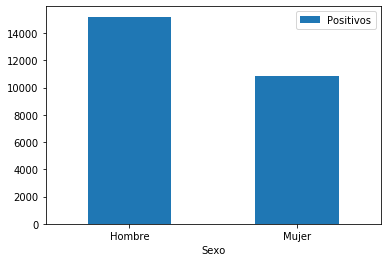

In [50]:
ContagionSex = pd.DataFrame({'Sexo': ['Hombre', 'Mujer'], 'Positivos': [15201, 10824,]})
SexPlot= ContagionSex.plot.bar(x='Sexo', y='Positivos', rot= 0)

In [27]:
CovidEdad = 'Resources/COVID_Clean_Data.csv'
CovidEdadDF = pd.read_csv(CovidEdad, encoding='utf-8')

In [28]:
CovidEdadDF = CovidEdadDF[['EDAD']]

In [29]:
CasosEdadDf= covid_mx_clean_df_2[['RESULTADO','EDAD']]
CasosEdadDf

,RESULTADO,EDAD
0,Positivo SARS-CoV-2,29
1,Positivo SARS-CoV-2,64
2,No Positivo SARS-CoV-2,64
3,No Positivo SARS-CoV-2,41
4,No Positivo SARS-CoV-2,69
...,...,...
105659,Resultado Pendiente,70
105660,Resultado Pendiente,42
105661,Resultado Pendiente,23
105662,Resultado Pendiente,36


In [30]:
Arriba00= CasosEdadDf[CasosEdadDf['EDAD']< 20]
Arriba00= Arriba00.groupby(Arriba00['RESULTADO']).count()
Arriba00

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,5694
Positivo SARS-CoV-2,579
Resultado Pendiente,688


In [31]:
Arriba20= CasosEdadDf[(CasosEdadDf['EDAD']>= 20) & (CasosEdadDf['EDAD']<30)]
Arriba20 =  Arriba20.groupby(Arriba20['RESULTADO']).count()
Arriba20

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,12004
Positivo SARS-CoV-2,2869
Resultado Pendiente,2234


In [32]:
Arriba30= CasosEdadDf[(CasosEdadDf['EDAD']>= 30) & (CasosEdadDf['EDAD']<40)]
Arriba30 =  Arriba30.groupby(Arriba30['RESULTADO']).count()
Arriba30

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,16146
Positivo SARS-CoV-2,5657
Resultado Pendiente,3900


In [33]:
Arriba40= CasosEdadDf[(CasosEdadDf['EDAD']>= 40) & (CasosEdadDf['EDAD']<50)]
Arriba40 =  Arriba40.groupby(Arriba40['RESULTADO']).count()
Arriba40

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,12790
Positivo SARS-CoV-2,6185
Resultado Pendiente,3784


In [34]:
Arriba50= CasosEdadDf[(CasosEdadDf['EDAD']>= 50) & (CasosEdadDf['EDAD']<60)]
Arriba50 =  Arriba50.groupby(Arriba50['RESULTADO']).count()
Arriba50

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,8419
Positivo SARS-CoV-2,5340
Resultado Pendiente,2873


In [35]:
Arriba60= CasosEdadDf[(CasosEdadDf['EDAD']>= 60) & (CasosEdadDf['EDAD']<70)]
Arriba60 =  Arriba60.groupby(Arriba60['RESULTADO']).count()
Arriba60

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,4508
Positivo SARS-CoV-2,3264
Resultado Pendiente,1517


In [36]:
Arriba70= CasosEdadDf[(CasosEdadDf['EDAD']>= 70) & (CasosEdadDf['EDAD']<80)]
Arriba70 =  Arriba70.groupby(Arriba70['RESULTADO']).count()
Arriba70

,EDAD
RESULTADO,
No Positivo SARS-CoV-2,2417
Positivo SARS-CoV-2,1536
Resultado Pendiente,752


In [ ]:
Arriba80= CasosEdadDf[CasosEdadDf['EDAD']>= 80]
Arriba80= Arriba80.groupby(Arriba80['RESULTADO']).count()
Arriba80

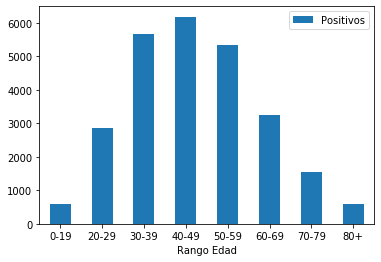

In [37]:
ContagionAge = pd.DataFrame({'Rango Edad': ['0-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80+'], 'Positivos': [579, 2864, 5657, 6185, 5340, 3264, 1536, 595]})
ContagionPlot= ContagionAge.plot.bar(x='Rango Edad', y='Positivos', rot= 0)

In [38]:
MuertesCovidDf = covid_mx_clean_df_2[[ 'RESULTADO','EDAD','FECHA_DEF' ]]
MuertesCovidDf

,RESULTADO,EDAD,FECHA_DEF
0,Positivo SARS-CoV-2,29,2020-12-31
1,Positivo SARS-CoV-2,64,2020-04-11
2,No Positivo SARS-CoV-2,64,2020-03-30
3,No Positivo SARS-CoV-2,41,2020-12-31
4,No Positivo SARS-CoV-2,69,2020-12-31
...,...,...,...
105659,Resultado Pendiente,70,2020-12-31
105660,Resultado Pendiente,42,2020-12-31
105661,Resultado Pendiente,23,2020-12-31
105662,Resultado Pendiente,36,2020-12-31


In [39]:
MortandadCovid= MuertesCovidDf[(MuertesCovidDf['RESULTADO']== "Positivo SARS-CoV-2")]
MortandadCovid

,RESULTADO,EDAD,FECHA_DEF
0,Positivo SARS-CoV-2,29,2020-12-31
1,Positivo SARS-CoV-2,64,2020-04-11
15,Positivo SARS-CoV-2,45,2020-12-31
28,Positivo SARS-CoV-2,45,2020-12-31
29,Positivo SARS-CoV-2,35,2020-12-31
...,...,...,...
105286,Positivo SARS-CoV-2,24,2020-12-31
105288,Positivo SARS-CoV-2,20,2020-12-31
105393,Positivo SARS-CoV-2,37,2020-12-31
105471,Positivo SARS-CoV-2,30,2020-12-31


In [40]:
MortandadCovid2= MortandadCovid[(MortandadCovid['FECHA_DEF']!= '2020-12-31')]
MortandadCovid2

,RESULTADO,EDAD,FECHA_DEF
1,Positivo SARS-CoV-2,64,2020-04-11
116,Positivo SARS-CoV-2,69,2020-03-27
147,Positivo SARS-CoV-2,39,2020-03-31
177,Positivo SARS-CoV-2,73,2020-03-29
180,Positivo SARS-CoV-2,37,2020-04-09
...,...,...,...
102761,Positivo SARS-CoV-2,57,2020-05-03
102774,Positivo SARS-CoV-2,84,2020-05-03
103902,Positivo SARS-CoV-2,64,2020-05-02
104339,Positivo SARS-CoV-2,53,2020-05-03


In [41]:
MortandadCovid2['EDAD'].max()

100

In [42]:
Muertes00= MortandadCovid2[MortandadCovid2['EDAD']< 20]
Muertes00= MortandadCovid2.groupby(Muertes00['RESULTADO']).count()
Muertes00

,RESULTADO,EDAD,FECHA_DEF
RESULTADO,,,
Positivo SARS-CoV-2,7,7,7


In [43]:
Muertes20= MortandadCovid2[(MortandadCovid2['EDAD']>= 20) & (MortandadCovid2['EDAD']<40)]
Muertes20= MortandadCovid2.groupby(Muertes20['RESULTADO']).count()
Muertes20

,RESULTADO,EDAD,FECHA_DEF
RESULTADO,,,
Positivo SARS-CoV-2,187,187,187


In [44]:
Muertes40= MortandadCovid2[(MortandadCovid2['EDAD']>= 40) & (MortandadCovid2['EDAD']<60)]
Muertes40= MortandadCovid2.groupby(Muertes40['RESULTADO']).count()
Muertes40

,RESULTADO,EDAD,FECHA_DEF
RESULTADO,,,
Positivo SARS-CoV-2,1093,1093,1093


In [45]:
Muertes60= MortandadCovid2[(MortandadCovid2['EDAD']>= 60) & (MortandadCovid2['EDAD']<80)]
Muertes60= MortandadCovid2.groupby(Muertes60['RESULTADO']).count()
Muertes60

,RESULTADO,EDAD,FECHA_DEF
RESULTADO,,,
Positivo SARS-CoV-2,1043,1043,1043


In [46]:
Muertes80= MortandadCovid2[MortandadCovid2['EDAD']>= 80]
Muertes80= MortandadCovid2.groupby(Muertes80['RESULTADO']).count()
Muertes80

,RESULTADO,EDAD,FECHA_DEF
RESULTADO,,,
Positivo SARS-CoV-2,177,177,177


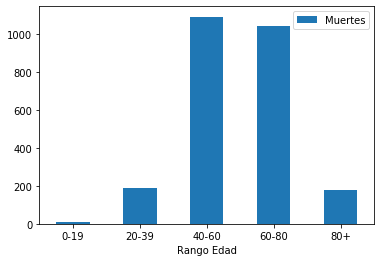

In [47]:
DeathAge = pd.DataFrame({'Rango Edad': ['0-19', '20-39', '40-60', '60-80','80+'], 'Muertes': [7, 187, 1093, 1043, 177]})
DeathPlot= DeathAge.plot.bar(x='Rango Edad', y='Muertes', rot= 0)